In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib.patheffects as path_effects
import os
import pandas as pd
from matplotlib.colors import LogNorm
from matplotlib import ticker

In [330]:
qcode = "HGP_100_4.qcode"
# qcode = "HGP_C422_200_4.qcode"

def ler_per_round(ax, qcode, label):
    f_path = f"../../results/parameter_testing/"
    f_name = f"{qcode}.res"

    df = pd.read_csv(f_path+f_name)
    df = df[(df['r'] % 10 == 0)]
    # df = df[(df['r'] > 20)]
    df['p_error'] = 1 - df['p_log']
    df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['num_test'])

    df['p_error'].replace(to_replace=0, value=0.5, inplace=True)

    df['ler_per_round'] = 1 - (1 - df['p_error'])**(1/df['r'])
    df['error_bars'] = (1 - df['p_error'])**(1/(df['r']-1)) * df['p_std_dev'] / df['r']

    ax.errorbar(df['r'], df['ler_per_round'], df['error_bars'], label=label, fmt='o')
    # ax.scatter(df['r'], df['ler_per_round'], label=qcode, marker='o', s=5)


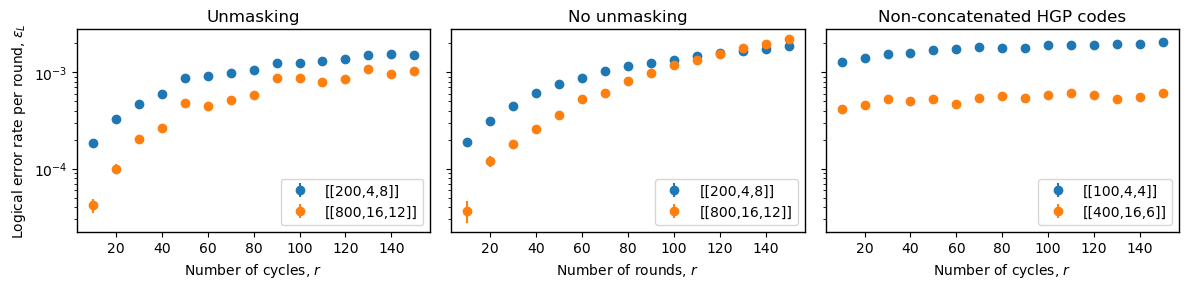

In [348]:
# plt.rc('font', family='serif')
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1

fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)

# ler_per_round(ax[0], "cat10/HGP_100_4.qcode")
# ler_per_round(ax, "HGP_C422_200_4.qcode")
# ler_per_round(ax, "cats0/HGP_C422_200_4.qcode")
# ler_per_round(ax, "cats10/HGP_C422_200_4.qcode")
# folder = "FT0"
folder = "extra/hgp"
folder2 = "extra/nonadaptive"
folder3 = "extra/variablesq"

ler_per_round(ax[0], f"{folder3}/HGP_C422_200_4.qcode", "[[200,4,8]]")
ler_per_round(ax[0], f"{folder3}/HGP_C422_800_16.qcode", "[[800,16,12]]")

ler_per_round(ax[1], f"{folder2}/HGP_C422_200_4.qcode", "[[200,4,8]]")
ler_per_round(ax[1], f"{folder2}/HGP_C422_800_16.qcode", "[[800,16,12]]")

ler_per_round(ax[2], f"{folder}/HGP_100_4.qcode", "[[100,4,4]]")
ler_per_round(ax[2], f"{folder}/HGP_400_16.qcode", "[[400,16,6]]")

ax[0].legend()
ax[1].legend()
ax[2].legend(loc='lower right')

ax[0].set_ylabel(r"Logical error rate per round, $\epsilon_L$")
ax[0].set_xlabel(r"Number of cycles, $r$")
ax[1].set_xlabel(r"Number of rounds, $r$")
ax[2].set_xlabel(r"Number of cycles, $r$")

ax[0].set_title("Unmasking")
ax[1].set_title("No unmasking")
ax[2].set_title("Non-concatenated HGP codes")

ax[0].set_yscale('log')
plt.tight_layout()


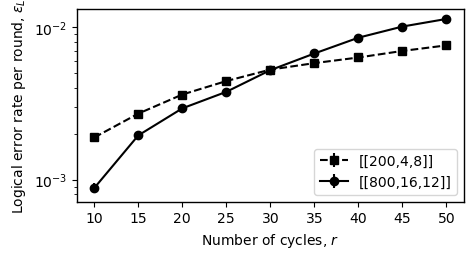

In [289]:
# plt.rc('font', family='serif')
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1

fig, ax = plt.subplots(1, 1, figsize=(5,2.5), sharey=True)

# ler_per_round(ax[0], "cat10/HGP_100_4.qcode")
# ler_per_round(ax, "HGP_C422_200_4.qcode")
# ler_per_round(ax, "cats0/HGP_C422_200_4.qcode")
# ler_per_round(ax, "cats10/HGP_C422_200_4.qcode")
folder = "FT0"
# folder2 = "extra/20"


qcode = f"{folder}/HGP_C422_200_4.qcode"
f_path = f"../../results/parameter_testing/"
f_name = f"{qcode}.res"

df = pd.read_csv(f_path+f_name)
df = df[(df['r'] % 5 == 0)]
# df = df[(df['r'] > 20)]
df['p_error'] = 1 - df['p_log']
df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['num_test'])

df['p_error'].replace(to_replace=0, value=0.5, inplace=True)

df['ler_per_round'] = 1 - (1 - df['p_error'])**(1/df['r'])
df['error_bars'] = (1 - df['p_error'])**(1/(df['r']-1)) * df['p_std_dev'] / df['r']

marker = 's'
ax.errorbar(df['r'], df['ler_per_round'], df['error_bars'], c='k', label="[[200,4,8]]", fmt='--', marker=marker)




qcode = f"{folder}/HGP_C422_800_16.qcode"
f_path = f"../../results/parameter_testing/"
f_name = f"{qcode}.res"

df = pd.read_csv(f_path+f_name)
df = df[(df['r'] % 5 == 0)]
# df = df[(df['r'] > 20)]
df['p_error'] = 1 - df['p_log']
df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['num_test'])

df['p_error'].replace(to_replace=0, value=0.5, inplace=True)

df['ler_per_round'] = 1 - (1 - df['p_error'])**(1/df['r'])
df['error_bars'] = (1 - df['p_error'])**(1/(df['r']-1)) * df['p_std_dev'] / df['r']

marker = 'o'
ax.errorbar(df['r'], df['ler_per_round'], df['error_bars'], c='k', label="[[800,16,12]]", fmt='-', marker=marker)

# ler_per_round(ax[0], f"{folder2}/HGP_C422_200_4.qcode", 1)
# ler_per_round(ax[0], f"{folder2}/HGP_C422_800_16.qcode", 1)

ax.legend(loc='lower right')

ax.set_ylabel(r"Logical error rate per round, $\epsilon_L$")
ax.set_xlabel(r"Number of cycles, $r$")

ax.set_yscale('log')
